In [1]:
# behavioral results

In [3]:
from os import path
from gradecc.utils.filenames import data_outside

import pandas as pd

dfb = pd.read_csv(path.join(data_outside, 'RL_behavior.csv'))

In [4]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


In [7]:
dfb.Subject.nunique()

45

In [13]:
sbehav = dfb.Subject.unique()

In [11]:
from gradecc.utils.filenames import subjects_filename

subjects_match = pd.read_csv(subjects_filename, delimiter='\t')
subjects_match

,participant_id,dicom_dir,exclude
0,1,AB1,0
1,2,AG1,0
2,3,AH1,0
3,4,AM1,0
4,5,AN1,1
5,6,AP1,0
6,7,AV1,0
7,8,BN1,0
8,9,CD1,0
9,10,CG1,0


In [12]:
set(subjects_match.dicom_dir) - set(sbehav)

{'RG1'}

In [15]:
dfb.Block.nunique()

2

In [19]:
dfb.Trial.max()

201

<AxesSubplot:xlabel='ReactionTime', ylabel='Count'>

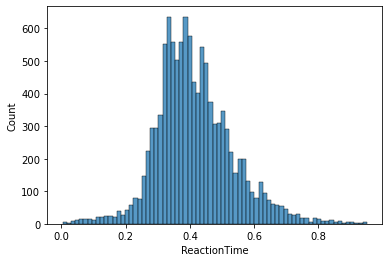

In [21]:
import seaborn as sns

sns.histplot(data=dfb, x='ReactionTime')

<AxesSubplot:xlabel='MovementTime', ylabel='Count'>

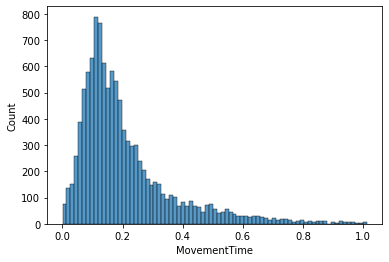

In [23]:
sns.histplot(data=dfb, x='MovementTime')

<AxesSubplot:xlabel='Score', ylabel='Count'>

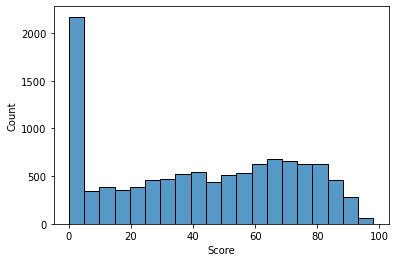

In [25]:
sns.histplot(data=dfb, x='Score')

In [ ]:
# is this the best measure?
# get path trace to try others

In [28]:
dfb.Valid.describe()

count     12170
unique        2
top        True
freq      11153
Name: Valid, dtype: object

<AxesSubplot:xlabel='Valid', ylabel='count'>

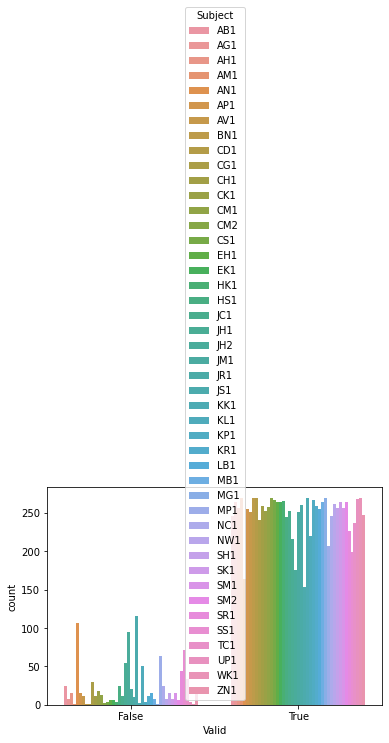

In [36]:
sns.countplot(data=dfb, x='Valid', hue='Subject')

In [38]:
dfb.groupby('Subject').Valid.count()

Subject
AB1    271
AG1    271
AH1    271
AM1    271
AN1    270
AP1    271
AV1    262
BN1    271
CD1    271
CG1    271
CH1    271
CK1    271
CM1    271
CM2    271
CS1    271
EH1    271
EK1    271
HK1    270
HS1    269
JC1    265
JH1    270
JH2    271
JM1    271
JR1    271
JS1    270
KK1    271
KL1    271
KP1    271
KR1    271
LB1    271
MB1    271
MG1    271
MP1    271
NC1    270
NW1    269
SH1    271
SK1    271
SM1    271
SM2    271
SR1    271
SS1    271
TC1    271
UP1    271
WK1    271
ZN1    270
Name: Valid, dtype: int64

In [43]:
dfb.Block.astype(str).describe()

count     12170
unique        2
top           2
freq       9022
Name: Block, dtype: object

In [46]:
dfb[dfb.Block == 1].Trial.max()

70

In [47]:
dfb[dfb.Block == 2].Trial.max()

201

In [48]:
dfb

,Subject,Block,Trial,Score,ReactionTime,MovementTime,Valid
0,AB1,1,1,53.0,0.365009,0.182444,True
1,AB1,1,2,51.0,0.548555,0.402011,True
2,AB1,1,3,7.0,0.472627,0.269147,True
3,AB1,1,4,0.0,0.557651,0.289636,True
4,AB1,1,5,34.0,0.588884,0.211777,True
...,...,...,...,...,...,...,...
12165,ZN1,2,197,13.0,0.330982,0.149212,True
12166,ZN1,2,198,48.0,0.443281,0.187577,True
12167,ZN1,2,199,68.0,0.454711,0.253610,True
12168,ZN1,2,200,72.0,0.269800,0.162063,True


In [49]:
# get feature importance with different brain MEASURES, connectivity expansion/contraction

In [54]:
dfb.Subject.unique()

array(['AB1', 'AG1', 'AH1', 'AM1', 'AN1', 'AP1', 'AV1', 'BN1', 'CD1',
       'CG1', 'CH1', 'CK1', 'CM1', 'CM2', 'CS1', 'EH1', 'EK1', 'HK1',
       'HS1', 'JC1', 'JH1', 'JH2', 'JM1', 'JR1', 'JS1', 'KK1', 'KL1',
       'KP1', 'KR1', 'LB1', 'MB1', 'MG1', 'MP1', 'NC1', 'NW1', 'SH1',
       'SK1', 'SM1', 'SM2', 'SR1', 'SS1', 'TC1', 'UP1', 'WK1', 'ZN1'],
      dtype=object)

<AxesSubplot:xlabel='Trial', ylabel='Score'>

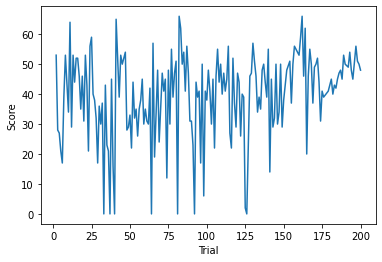

In [55]:
sns.lineplot(data=dfb[(dfb.Subject == 'AH1') & (dfb.Block == 2)],
             x='Trial', y='Score')

In [90]:
def subject_avg_score(dfb, score_window=40, block=2, agg='mean'):
    return dfb[(dfb.Block == block) & (dfb.Trial <= score_window)] \
        .groupby('Subject').Score.agg(agg)

In [97]:
subject_avg_score(dfb, score_window=40, block=2, agg='std')

Subject
AB1    12.316217
AG1    23.090826
AH1    16.401696
AM1    18.791689
AN1    26.716521
AP1    27.557008
AV1    25.188949
BN1    36.094170
CD1    13.215157
CG1    20.410875
CH1    21.967712
CK1     8.312552
CM1    18.491107
CM2    21.396366
CS1     0.000000
EH1    11.885673
EK1    15.818502
HK1    21.473165
HS1    21.467893
JC1    26.116525
JH1    21.592110
JH2    16.235975
JM1    21.461892
JR1    16.675619
JS1    20.401171
KK1    15.868369
KL1     5.554141
KP1    21.078736
KR1    22.230534
LB1    12.172927
MB1    20.185661
MG1    24.927060
MP1    23.615219
NC1    33.620773
NW1    19.198656
SH1    20.097822
SK1    11.005213
SM1    26.490356
SM2    20.429428
SR1    12.084537
SS1    21.868358
TC1    15.532671
UP1    22.404212
WK1    25.001538
ZN1    28.951958
Name: Score, dtype: float64

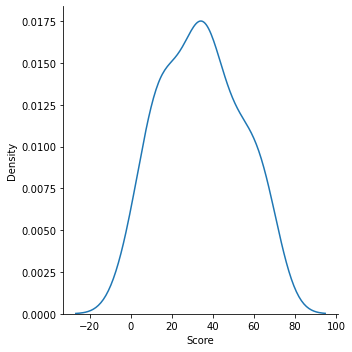

In [91]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

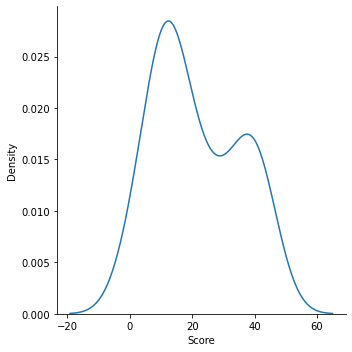

In [92]:
subj_init_score = subject_avg_score(dfb, score_window=10, block=2, agg='mean')
sns.displot(subj_init_score, kind='kde')

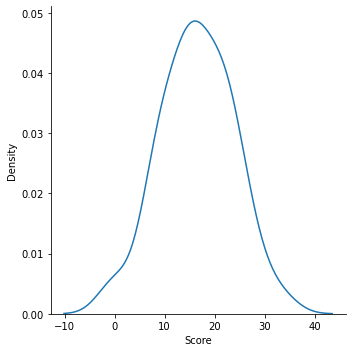

In [93]:
subj_init_score = subject_avg_score(dfb, score_window=10, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

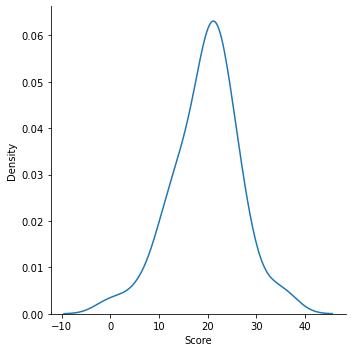

In [94]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='std')
sns.displot(subj_init_score, kind='kde')

In [88]:
from gradecc.compute.measures import get_measures

dfm = get_measures()
dfm = dfm.merge(subjects_match, left_on='subject', right_on='participant_id')
dfm = dfm[dfm.exclude == 0]
dfm

Reading data from /Users/qasem/PycharmProjects/gradients-rl-task/data/measures.csv


,value,region,subject,epic,measure,participant_id,dicom_dir,exclude
0,0.515067,7Networks_LH_Vis_1,1,baseline,gradient1,1,AB1,0
1,0.829542,7Networks_LH_Vis_2,1,baseline,gradient1,1,AB1,0
2,0.537888,7Networks_LH_Vis_3,1,baseline,gradient1,1,AB1,0
3,-0.432275,7Networks_LH_Vis_4,1,baseline,gradient1,1,AB1,0
4,0.644839,7Networks_LH_Vis_5,1,baseline,gradient1,1,AB1,0
...,...,...,...,...,...,...,...,...
592795,1.528952,Vermis VI,46,late,eccentricity,46,ZN1,0
592796,1.148793,Vermis VIIIa,46,late,eccentricity,46,ZN1,0
592797,0.494938,Vermis VIIIb,46,late,eccentricity,46,ZN1,0
592798,0.828814,Vermis VIIb,46,late,eccentricity,46,ZN1,0


In [95]:
d = dfm[(dfm.region == '7Networks_LH_Default_PFC_19') &
    (dfm.epic == 'early') & (dfm.measure == 'eccentricity')
]
d

,value,region,subject,epic,measure,participant_id,dicom_dir,exclude
13587,3.487743,7Networks_LH_Default_PFC_19,1,early,eccentricity,1,AB1,0
29187,3.424829,7Networks_LH_Default_PFC_19,2,early,eccentricity,2,AG1,0
44787,1.538534,7Networks_LH_Default_PFC_19,3,early,eccentricity,3,AH1,0
60387,4.102743,7Networks_LH_Default_PFC_19,4,early,eccentricity,4,AM1,0
75987,3.645133,7Networks_LH_Default_PFC_19,6,early,eccentricity,6,AP1,0
91587,3.427919,7Networks_LH_Default_PFC_19,7,early,eccentricity,7,AV1,0
107187,3.555991,7Networks_LH_Default_PFC_19,8,early,eccentricity,8,BN1,0
122787,2.758968,7Networks_LH_Default_PFC_19,9,early,eccentricity,9,CD1,0
138387,3.156659,7Networks_LH_Default_PFC_19,10,early,eccentricity,10,CG1,0
153987,3.108713,7Networks_LH_Default_PFC_19,11,early,eccentricity,11,CH1,0


In [99]:
subj_init_score = subject_avg_score(dfb, score_window=40, block=2, agg='mean')
subj_init_score

Subject
AB1    12.243243
AG1    52.846154
AH1    35.105263
AM1    14.275000
AN1    30.928571
AP1    36.076923
AV1    49.205128
BN1    56.075000
CD1    17.975000
CG1    27.906250
CH1    36.473684
CK1     3.512821
CM1    28.605263
CM2    67.875000
CS1     0.000000
EH1     9.750000
EK1    15.925000
HK1    20.325000
HS1    64.846154
JC1    29.923077
JH1    12.054054
JH2    16.958333
JM1    29.550000
JR1    33.975000
JS1    50.272727
KK1    12.700000
KL1     2.000000
KP1    37.051282
KR1    31.742857
LB1     9.638889
MB1    47.025000
MG1    63.775000
MP1    45.583333
NC1    37.550000
NW1    18.128205
SH1    63.225000
SK1    39.205128
SM1    51.868421
SM2    58.150000
SR1    17.729730
SS1    34.074074
TC1    61.171429
UP1    41.000000
WK1    66.000000
ZN1    38.111111
Name: Score, dtype: float64

In [ ]:
# example

In [119]:
x = d.set_index('dicom_dir').value

dd = x.reset_index().merge(subj_init_score.reset_index(),
           left_on='dicom_dir', right_on='Subject')
dd

,dicom_dir,value,Subject,Score
0,AB1,3.487743,AB1,12.243243
1,AG1,3.424829,AG1,52.846154
2,AH1,1.538534,AH1,35.105263
3,AM1,4.102743,AM1,14.275000
4,AP1,3.645133,AP1,36.076923
5,AV1,3.427919,AV1,49.205128
6,BN1,3.555991,BN1,56.075000
7,CD1,2.758968,CD1,17.975000
8,CG1,3.156659,CG1,27.906250
9,CH1,3.108713,CH1,36.473684


<AxesSubplot:xlabel='value', ylabel='Score'>

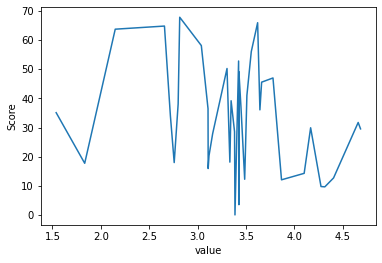

In [120]:
sns.lineplot(data=dd, x='value', y='Score')

In [122]:
from scipy.stats import pearsonr

pearsonr(x=dd['value'], y=dd['Score'])

(-0.2764317848913436, 0.09767983484271525)

In [142]:
def corr(data, x, y):
    return pearsonr(data[x], data[y])

In [127]:
subj_init_score

Subject
AB1    12.243243
AG1    52.846154
AH1    35.105263
AM1    14.275000
AN1    30.928571
AP1    36.076923
AV1    49.205128
BN1    56.075000
CD1    17.975000
CG1    27.906250
CH1    36.473684
CK1     3.512821
CM1    28.605263
CM2    67.875000
CS1     0.000000
EH1     9.750000
EK1    15.925000
HK1    20.325000
HS1    64.846154
JC1    29.923077
JH1    12.054054
JH2    16.958333
JM1    29.550000
JR1    33.975000
JS1    50.272727
KK1    12.700000
KL1     2.000000
KP1    37.051282
KR1    31.742857
LB1     9.638889
MB1    47.025000
MG1    63.775000
MP1    45.583333
NC1    37.550000
NW1    18.128205
SH1    63.225000
SK1    39.205128
SM1    51.868421
SM2    58.150000
SR1    17.729730
SS1    34.074074
TC1    61.171429
UP1    41.000000
WK1    66.000000
ZN1    38.111111
Name: Score, dtype: float64

In [145]:
dfm_ = dfm[(dfm.epic == 'early') & (dfm.measure == 'eccentricity')].merge(subj_init_score.reset_index(), how='inner', left_on='dicom_dir', right_on='Subject')
dfm_

,value,region,subject,epic,measure,participant_id,dicom_dir,exclude,Subject,Score
0,1.750906,7Networks_LH_Cont_Cing_1,1,early,eccentricity,1,AB1,0,AB1,12.243243
1,0.374219,7Networks_LH_Cont_Cing_2,1,early,eccentricity,1,AB1,0,AB1,12.243243
2,1.303648,7Networks_LH_Cont_Cing_3,1,early,eccentricity,1,AB1,0,AB1,12.243243
3,1.032812,7Networks_LH_Cont_Cing_4,1,early,eccentricity,1,AB1,0,AB1,12.243243
4,0.821108,7Networks_LH_Cont_Cing_5,1,early,eccentricity,1,AB1,0,AB1,12.243243
...,...,...,...,...,...,...,...,...,...,...
38475,1.011658,Vermis VI,46,early,eccentricity,46,ZN1,0,ZN1,38.111111
38476,1.021005,Vermis VIIIa,46,early,eccentricity,46,ZN1,0,ZN1,38.111111
38477,0.742754,Vermis VIIIb,46,early,eccentricity,46,ZN1,0,ZN1,38.111111
38478,0.705703,Vermis VIIb,46,early,eccentricity,46,ZN1,0,ZN1,38.111111


In [176]:
def _expand_p_r(df):
    return pd.DataFrame(df.tolist(), columns=['r', 'p'], index=df.index)

In [180]:
dfm = dfm.merge(subj_init_score.reset_index(), how='inner', left_on='dicom_dir', right_on='Subject')
dfm

,value,region,subject,epic,measure,participant_id,dicom_dir,exclude,Subject,Score
0,0.515067,7Networks_LH_Vis_1,1,baseline,gradient1,1,AB1,0,AB1,12.243243
1,0.829542,7Networks_LH_Vis_2,1,baseline,gradient1,1,AB1,0,AB1,12.243243
2,0.537888,7Networks_LH_Vis_3,1,baseline,gradient1,1,AB1,0,AB1,12.243243
3,-0.432275,7Networks_LH_Vis_4,1,baseline,gradient1,1,AB1,0,AB1,12.243243
4,0.644839,7Networks_LH_Vis_5,1,baseline,gradient1,1,AB1,0,AB1,12.243243
...,...,...,...,...,...,...,...,...,...,...
577195,1.528952,Vermis VI,46,late,eccentricity,46,ZN1,0,ZN1,38.111111
577196,1.148793,Vermis VIIIa,46,late,eccentricity,46,ZN1,0,ZN1,38.111111
577197,0.494938,Vermis VIIIb,46,late,eccentricity,46,ZN1,0,ZN1,38.111111
577198,0.828814,Vermis VIIb,46,late,eccentricity,46,ZN1,0,ZN1,38.111111


In [181]:
dfpr = _expand_p_r(
    dfm.groupby(['epic', 'measure', 'region']).apply(corr, 'value', 'Score')
)

In [182]:
dfpr

r         p
epic     measure      region                                      
baseline eccentricity 7Networks_LH_Cont_Cing_1  0.158239  0.349580
                      7Networks_LH_Cont_Cing_2 -0.392675  0.016216
                      7Networks_LH_Cont_Cing_3  0.087009  0.608607
                      7Networks_LH_Cont_Cing_4  0.073385  0.666001
                      7Networks_LH_Cont_Cing_5  0.211794  0.208243
...                                                  ...       ...
late     gradient4    Vermis VI                 0.135839  0.422758
                      Vermis VIIIa              0.152695  0.366932
                      Vermis VIIIb              0.134145  0.428622
                      Vermis VIIb               0.191109  0.257192
                      Vermis X                  0.152941  0.366150

[15600 rows x 2 columns]

In [184]:
from gradecc.utils.filenames import data_inside

# dfpr.to_csv(path.join(data_inside, 'behavioral_pr.csv'))

In [190]:
dfpr.xs(('baseline', 'gradient1'))

,r,p
region,,
7Networks_LH_Cont_Cing_1,0.214493,0.202369
7Networks_LH_Cont_Cing_2,0.269608,0.106589
7Networks_LH_Cont_Cing_3,0.146985,0.385329
7Networks_LH_Cont_Cing_4,-0.076469,0.652828
7Networks_LH_Cont_Cing_5,-0.095267,0.574883
...,...,...
Vermis VI,-0.324478,0.050071
Vermis VIIIa,0.075964,0.654979
Vermis VIIIb,-0.023122,0.891952


In [ ]:
# todo make function to match by index

In [198]:
from gradecc.plot import plot_subc, plot_cortex

def _plot_behav_corr():
    color_range = (-1, 1)
    for grad in ['eccentricity', 'gradient1', 'gradient2', 'gradient3', 'gradient4']:
        for epic in ['baseline', 'early', 'late']:
            data = dfpr.xs((epic, grad)).reset_index()

            plot_cortex(data, value='r', mask='p',
                        color_map='bwr', color_range=color_range,
                        text=('cortical behavioural ' + grad + ' ' + epic.upper()),
                        save_figure=True)

            plot_subc(data, value='r',
            color_map='bwr', color_range=color_range,
                      text=('subcortical behavioural ' + grad + ' ' + epic.upper()))


_plot_behav_corr()

In [196]:
dfpr[dfpr.p < 0.05].reset_index()

,epic,measure,region,r,p
0,baseline,eccentricity,7Networks_LH_Cont_Cing_2,-0.392675,0.016216
1,baseline,eccentricity,7Networks_LH_Default_PFC_31,0.385542,0.018444
2,baseline,eccentricity,7Networks_LH_Default_PFC_5,0.341043,0.038860
3,baseline,eccentricity,7Networks_LH_Default_Par_12,-0.390610,0.016836
4,baseline,eccentricity,7Networks_LH_Default_pCunPCC_12,0.325153,0.049568
...,...,...,...,...,...
685,late,gradient4,7Networks_RH_Vis_35,0.389169,0.017281
686,late,gradient4,7Networks_RH_Vis_38,0.372160,0.023316
687,late,gradient4,7Networks_RH_Vis_43,0.464856,0.003746
688,late,gradient4,7Networks_RH_Vis_45,0.344857,0.036592


In [199]:
# early ecc significant in subc
[
'Vermis VIIb',
'Vermis VIIIa',
'Right VIIIa',
'Right Hippocampus',
'Left Pallidum',
]

['Vermis VIIb',
 'Vermis VIIIa',
 'Right VIIIa',
 'Right Hippocampus',
 'Left Pallidum']